<a href="https://colab.research.google.com/github/utku-ozcan/Machine_Learning/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from keras.layers import Convolution2D
import cv2
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

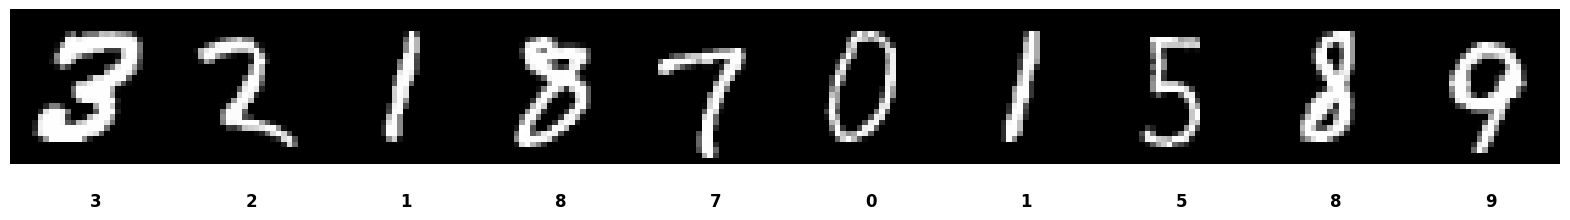

In [5]:
display_random_images(X_train, y_train)

In [6]:
labels = {0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9'}
num_classes = 10


In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train_exp = np.expand_dims(X_train,-1)
X_test_exp = np.expand_dims(X_test,-1)

In [9]:
X_train_exp.shape

(60000, 28, 28, 1)

In [10]:
X_train_1 = X_train_exp.astype('float32') / 255.0
y_train_encoded = to_categorical(y_train, num_classes=10)
X_test_1 = X_test_exp.astype('float32') / 255.0
y_test_encoded = to_categorical(y_test, num_classes=10)

In [11]:
from keras.layers import Conv2D
from keras.layers import MaxPool2D

In [12]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

In [13]:
optimizer = SGD(learning_rate = 0.1)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 10)                108170    
                                                                 
Total params: 108810 (425.04 KB)
Trainable params: 108810 (425.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
history = model.fit(X_train_1, y_train_encoded, epochs=50, batch_size=128, validation_split = 0.2)

Epoch 1/50
375/375 [==============================] - 5s 5ms/step - loss: 0.4496 - accuracy: 0.8684 - val_loss: 0.2824 - val_accuracy: 0.9204
Epoch 2/50
375/375 [==============================] - 1s 4ms/step - loss: 0.2819 - accuracy: 0.9170 - val_loss: 0.2490 - val_accuracy: 0.9289
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.2292 - accuracy: 0.9345 - val_loss: 0.1898 - val_accuracy: 0.9485
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.1837 - accuracy: 0.9479 - val_loss: 0.1559 - val_accuracy: 0.9582
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.1502 - accuracy: 0.9581 - val_loss: 0.1364 - val_accuracy: 0.9638
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.1262 - accuracy: 0.9645 - val_loss: 0.1153 - val_accuracy: 0.9696
Epoch 7/50
375/375 [==============================] - 2s 4ms/step - loss: 0.1105 - accuracy: 0.9688 - val_loss: 0.1052 - val_accuracy: 0.9718
Epoch 

In [16]:
score = model.evaluate(X_test_1, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 0.06555096060037613
Test accuracy: 98.05999994277954 %


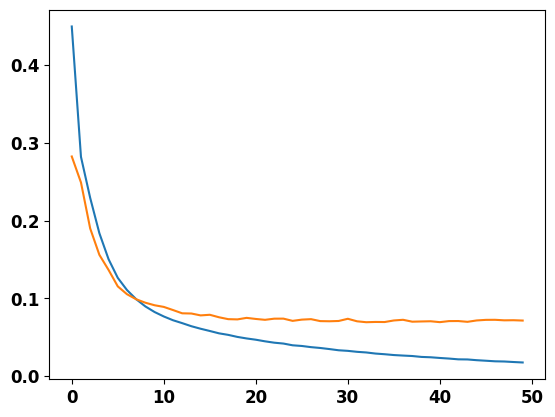

In [17]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

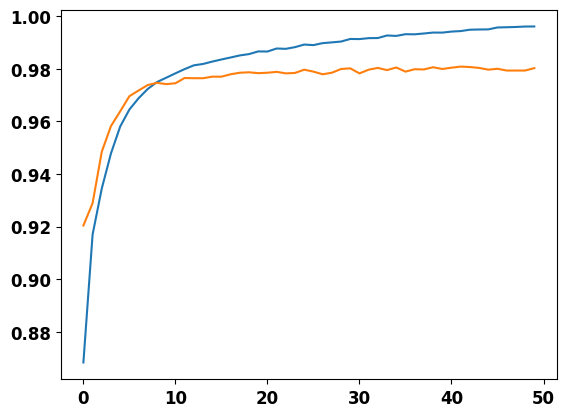

In [18]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [19]:
def show_the_best_predictions(model, x_test: np.array, y_test: np.array, n_of_pred: int = 10) -> None:
  mapping = {0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9'}

  predictions = model.predict(x_test)
  y_test = y_test.reshape(1,-1)
  predictions_ind = np.argmax(predictions, axis=1)
  predictions_ind = predictions_ind.reshape(1, -1)

  corect_predictions = np.where(predictions_ind == y_test)

  rows_correct = corect_predictions[1]
  predictedtions_correct = predictions[rows_correct]
  target_correct = y_test[0][rows_correct]

  max_samples = predictions[rows_correct, target_correct]
  selected_images = x_test[rows_correct]
  sorted_ind = np.argsort(max_samples)[::-1]


  images = []
  prob = []
  labels = []


  for ind in range(n_of_pred):

    index = sorted_ind[ind]

    labels.append(target_correct[index])
    prob.append(max_samples[index])
    images.append(selected_images[index])

  plt.figure(figsize=(20,10))

  images = np.concatenate(np.asarray(images),axis=1)
  plt.imshow(images)
  for ins in range(n_of_pred):
    texts = '{}: \n{:.3f} %'.format(mapping[labels[ins]], prob[ins]*100)
    plt.text((32/2) + 32*ins - len(mapping[labels[ins]]), 32*(5/4), texts)

  plt.axis('off')
  plt.show()

313/313 [==============================] - 1s 2ms/step


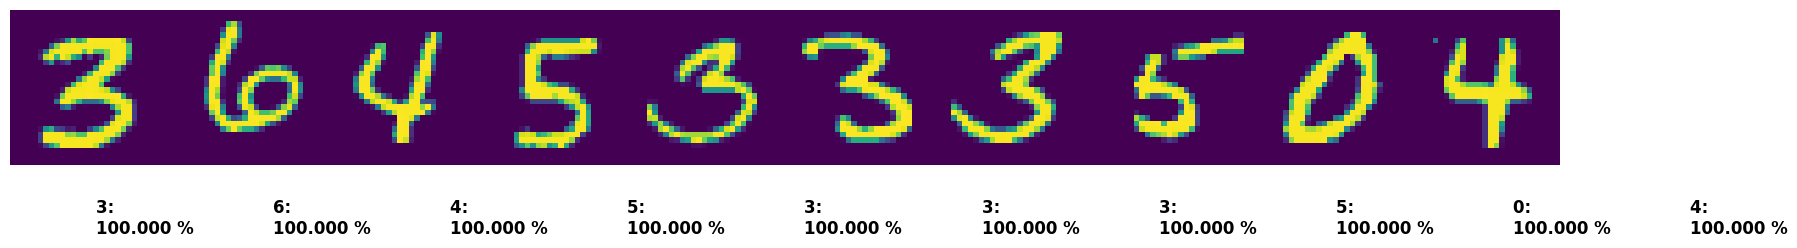

In [20]:
show_the_best_predictions(model, X_test_1, y_test)